<a href="https://colab.research.google.com/github/donmarcolaureano/predictionofproductsales/blob/main/PredictionOfProductSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Prediction of Product Sales
-Marco Laureano


## Project Overview
- The purpose of this project is to project the product sales for food items sold at various stores.
- The goal is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales

## Data Dictionary

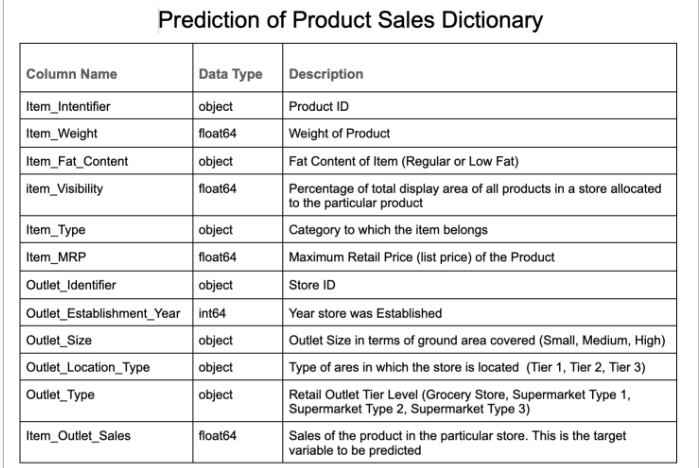



## Load and Inspect Data

In [232]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [233]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
# import data
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df_sales_predictions = pd.read_csv(fname)

In [235]:
df_sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [236]:
# Check info
df_sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [237]:
# How many rows and columns
rows = len(df_sales_predictions.axes[0])
cols = len(df_sales_predictions.axes[1])
print('Number of Rows: ', rows)
print('Number of Columns', cols)

Number of Rows:  8523
Number of Columns 12


In [238]:
# what are the data types of each variable
df_sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [239]:
# Are there duplicates? If so, drop dupes
# Create duplicate filter
duplicated_rows = df_sales_predictions.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [240]:
# Count dupes
df_sales_predictions.duplicated().sum()

0

In [241]:
# Identify missing values
df_sales_predictions.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [242]:
# Total number of null values (true) for each column
null_sums = df_sales_predictions.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [243]:
# Percent of null values
null_percent = null_sums/len(df_sales_predictions) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [244]:
# view only colums with null values
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

### Address missing values by using a placeholder value

In [245]:
# Saving list of column names for object columns
cat_cols = df_sales_predictions.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [246]:
#Fill null values with MISSING
cat_cols = df_sales_predictions.select_dtypes('object').columns
df_sales_predictions[cat_cols] = df_sales_predictions[cat_cols].fillna('MISSING')


In [247]:
# fill missing numerical values with -1
num_vals = df_sales_predictions.select_dtypes('number').columns
df_sales_predictions[num_vals] = df_sales_predictions[num_vals].fillna(-1)

In [248]:
# Confirm that there are no missing values after addressing them
df_sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Find and fix inconsistent categories of data

In [249]:
# Identify string columns
string_cols = df_sales_predictions.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [250]:
# Obtain values counts for all string columns
for col in string_cols:
  print(f'Value Counts for {col}')
  print(df_sales_predictions[col].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [251]:
# Check unique values and counts of Item_Fat_Content column
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

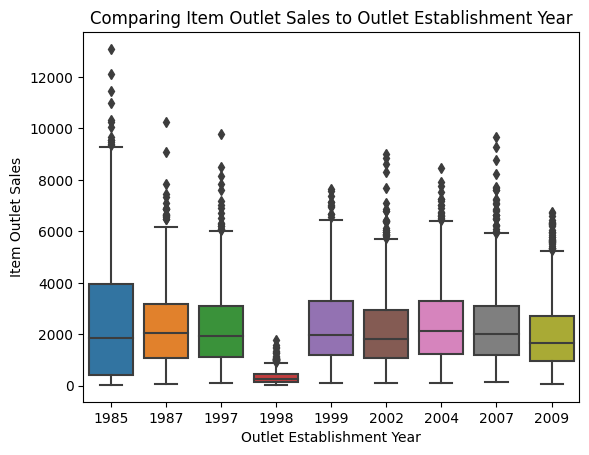

In [252]:
# boxplot
ax = sns.boxplot(data=df_sales_predictions, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
ax.set_title('Comparing Item Outlet Sales to Outlet Establishment Year')
ax.set_xlabel('Outlet Establishment Year')
ax.set_ylabel('Item Outlet Sales');

In [253]:
#Standardize the values
df_sales_predictions['Item_Fat_Content'] = df_sales_predictions['Item_Fat_Content'].replace({'LF':'Low Fat', 'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'})
df_sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Obtain summary statistics for numerical columns
- The numerical columns in this data set are: Outlet Establishment Year

In [254]:
# Outlet Establishment Min
df_sales_predictions['Outlet_Establishment_Year'].min()


1985

In [255]:
# Outlet Establishment Max
df_sales_predictions['Outlet_Establishment_Year'].max()


2009

In [256]:
# Outlet Establishment Mean
df_sales_predictions['Outlet_Establishment_Year'].mean().round(2)

1997.83

## Exploratory Data Analysis

In [257]:
df_sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


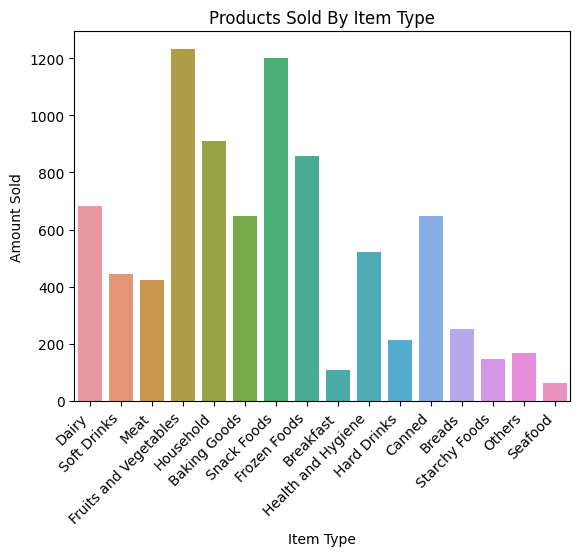

In [258]:
# Countplot of items
ax = sns.countplot(data=df_sales_predictions, x='Item_Type')
ax.set_title('Products Sold By Item Type')
ax.set_xlabel('Item Type')
ax.set_ylabel('Amount Sold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

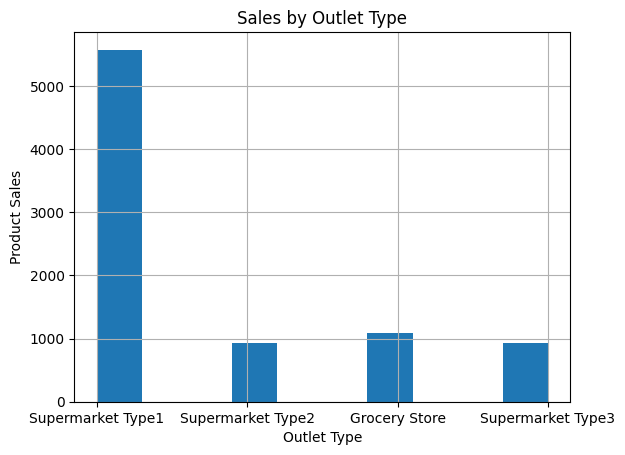

In [259]:
# histogram for Outlet type
ax = df_sales_predictions['Outlet_Type'].hist()
ax.set_title('Sales by Outlet Type')
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Product Sales');

In [260]:
# heatmap correlations
corr = df_sales_predictions.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


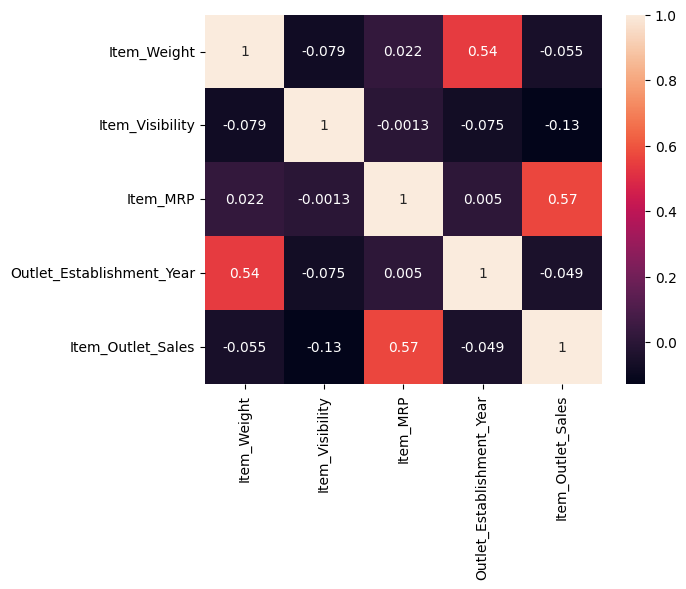

In [261]:
#heatmap
sns.heatmap(corr, annot = True);

___

# Feature Inspection

### Remove (-1) placeholders and replace with null

In [262]:
# (-1) placeholders = missing numerical values in columns
# Replace -1 with np.nan
df_sales_predictions = df_sales_predictions.replace(-1, np.nan)
# check value counts
df_sales_predictions.value_counts(dropna=False)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       Low Fat           0.000000         Soft Drinks            141.6154  OUT045             2002                       MISSING      Tier 2                Supermarket Type1  3829.0158            1
FDV28            16.100       Regular           0.000000         Frozen Foods           35.1558   OUT017             2007                       MISSING      Tier 2                Supermarket Type1  339.5580             1
FDV32            7.785        Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       MISSING      Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009

In [263]:
# check dtypes
df_sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [264]:
# check head
df_sales_predictions.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,MISSING,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,MISSING,Tier 2,Supermarket Type1,4710.5350


In [265]:
# check amount of null values per column
null_sums = df_sales_predictions.isna().sum()
null_sums[null_sums>0]

Item_Weight    1463
dtype: int64

In [266]:
# Ccalculate the percent of null values
null_percent = null_sums/len(df_sales_predictions) * 100
# show only columns with missing values
null_percent[null_percent>0].round(2)

Item_Weight    17.17
dtype: float64

In [267]:
# Check missing categorical columns
df_sales_predictions[cat_cols].isna().sum()


Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

# Features

### EDA function

In [279]:
# Categorical EDA function with print statements
def explore_categorical(df_sales_predictions, x, fillna=True, placeholder='MISSING', order = None):
  #copy of dataframe and fillna
  temp_df = df_sales_predictions.copy()
  #save null value counts and percent for print
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df) * 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x].fillna(placeholder)
  # create figure with desired figsize
  fig, ax = plt.subplots()
  #plot countplot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  #rotate tick labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # add title with feature name included
  ax.set_title(f'Column{x}')

  # fix layout and show plot before print statement
  fig.tight_layout()
  plt.show()

  # print null value info
  print(f"Nan's Found: {null_count} ({round(null_perc,2)}%")

  #print cardinality
  nunique = temp_df[x].nunique()
  print(f"Unique Values: {nunique}")

  # value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  #define frequency of most common value
  most_common_val = val_counts.index[0]
  # define frequency of most common value
  freq = val_counts.values[0]
  # calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # print results
  print(f" Most common value: '{most_common_val}' occurs {freq} times")

  #print message if quasi-constant or constant
  if perc_most_common > 98:
    print(f"\n [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped")
  else: print('Not constant or quasi constant')
  return fig, ax

In [269]:
# explore numeric EDA function
def explore_numeric(df_sales_predictions, x, figsize=(6,5)):
  # make figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize, sharex=True, gridspec_kw=gridspec)

  #histogram on top
  sns.histplot(data=df_sales_predictions, x=x, ax=axes[0])
  #boxplot on bottom
  sns.boxplot(data=df_sales_predictions, x=x, ax=axes[1])
  #add title
  axes[0].set_title(f'Column: {x}')
  #adjust subplots to best fill figure
  fig.tight_layout()

  # arrange plot before message
  plt.show()

  ## print message with info count and % of nulls
  null_count = df_sales_predictions[x].isna().sum()
  null_perc= null_count/len(df_sales_predictions) * 100
  print(f"Nan's Found: {null_count} ({round(null_perc, 2)}%)")

In [270]:
# categorical v target EDA function
def plot_categorical_vs_target(df_sales_predictions, x, y='Item_Outlet_Sales', figsize=(6,4), fillna=True, placeholder='MISSING', order = None):
  # make copy of df
  temp_df=df_sales_predictions.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
    # create the figure and subplots
  fig, ax= plt.subplots(figsize=figsize)

  # barplot
  sns.barplot(data=temp_df, x=x, y=y, hue=x, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)

  # box plot
  ax.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax, order=order, hue_order=order, legent=False, edgecolor='white', linewidth=0.5, size=3, zorder=0)

  # add title
  ax.set_title(f'{x} vs {y}')
  fig.tight_layout()
  return fig, ax

In [271]:
# Set max display
pd.set_option('display.max_columns',1000)

## Item_Identifier
- Definition: Product ID

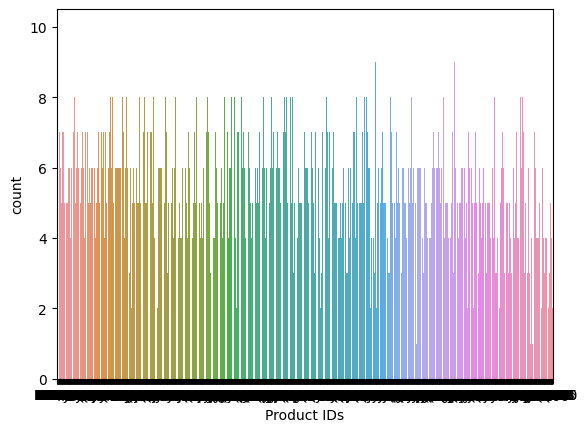

In [272]:
ax = sns.countplot(data=df_sales_predictions, x='Item_Identifier')
ax.set_xlabel('Product IDs');

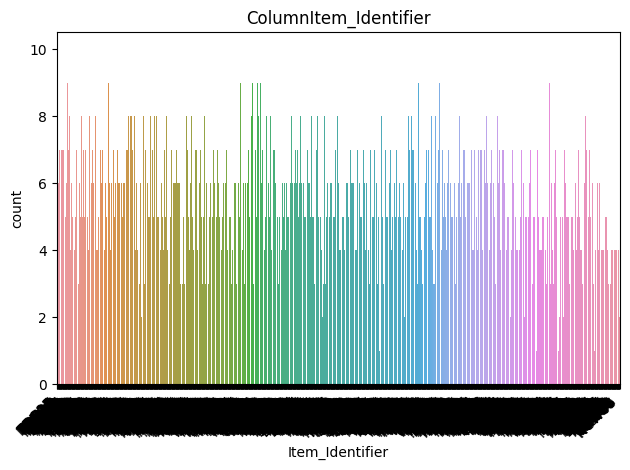

Nan's Found: 0 (0.0%
Unique Values: 1559
 Most common value: 'FDW13' occurs 10 times
Not constant or quasi constant


In [282]:
explore_categorical(df_sales_predictions, 'Item_Identifier');

In [281]:
# check cardinality
nunique = df_sales_predictions['Item_Identifier'].nunique()
print(f'There are {nunique} unique values')

There are 1559 unique values


- What type of feature is it?
  - Categorial

- How many null values? What percentage? What would you do with the null values
  - 0

- Is the feature constant or quasi-constant?
  - Constant

- What is the cardinality? Is it high (>10)?
  - 1559, very high

- Would we know this feature before the target is determined?
  - Yes

- Is there a business case/understanding reason to exclude based on our business case?
  - This is just a list of the product ID's

## Item_Weight
- Definition: Weight of Product

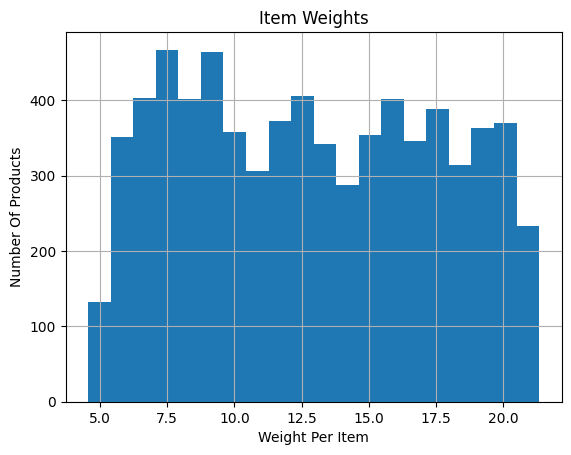

In [283]:
# Item Weight Histogram
ax = df_sales_predictions['Item_Weight'].hist(bins='auto')
ax.set_title('Item Weights')
ax.set_xlabel('Weight Per Item')
ax.set_ylabel('Number Of Products');

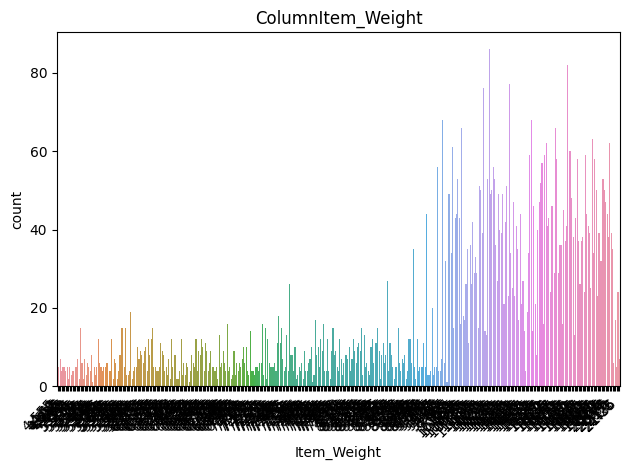

Nan's Found: 1463 (17.17%
Unique Values: 415
 Most common value: 'nan' occurs 1463 times
Not constant or quasi constant


In [285]:
explore_categorical(df_sales_predictions, 'Item_Weight');

In [286]:
# Check cardinality
nunique = df_sales_predictions['Item_Weight'].nunique()
print(f'There are {nunique} unique values')

There are 415 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?) 1463, 17.17%

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 415, very high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Item_Fat_Content
- Definition: Fat Content of Item (Regular or Low Fat)



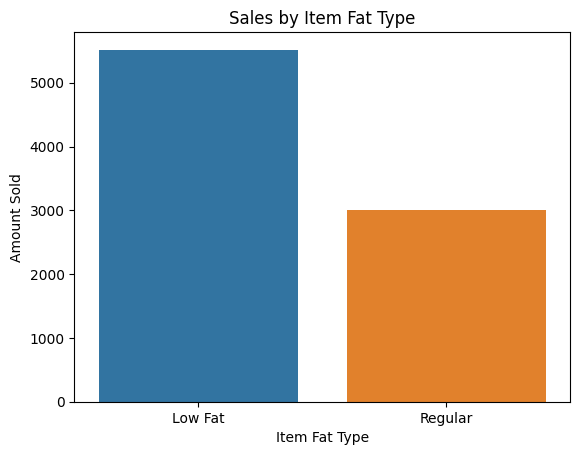

In [287]:
ax = sns.countplot(data=df_sales_predictions, x='Item_Fat_Content')
ax.set_title('Sales by Item Fat Type')
ax.set_ylabel('Amount Sold')
ax.set_xlabel('Item Fat Type');

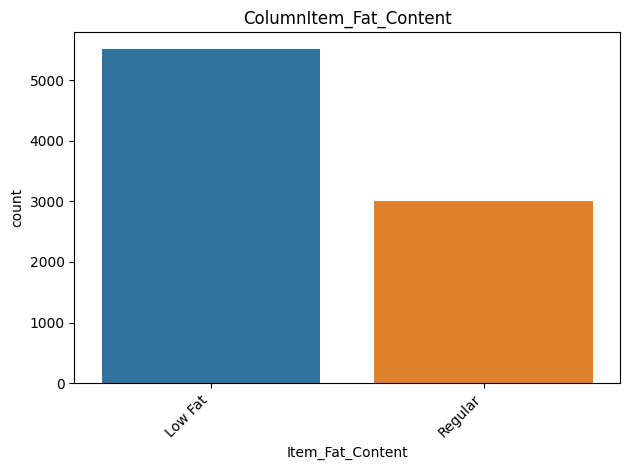

Nan's Found: 0 (0.0%
Unique Values: 2
 Most common value: 'Low Fat' occurs 5517 times
Not constant or quasi constant


In [289]:
explore_categorical(df_sales_predictions, 'Item_Fat_Content');

In [288]:
# Check cardinality
nunique = df_sales_predictions['Item_Fat_Content'].nunique()
print(f'There are {nunique} unique values')

There are 2 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 2, it is not high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Item_Visibility
- Definition: Percentage of total display area of all products in a store allocated to the particular product

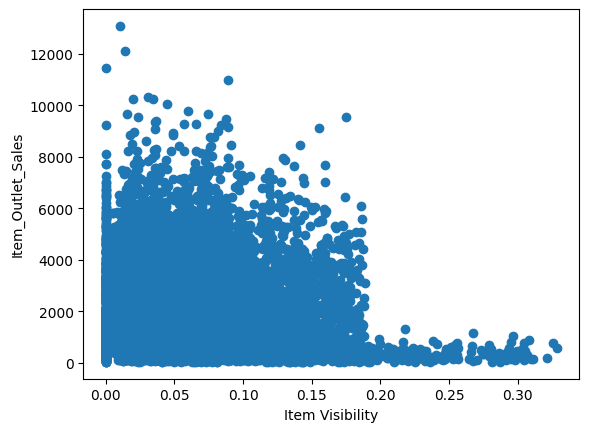

In [290]:
fig, ax = plt.subplots()
ax.scatter(df_sales_predictions['Item_Visibility'], df_sales_predictions['Item_Outlet_Sales']);
ax.set(xlabel='Item Visibility', ylabel="Item_Outlet_Sales");

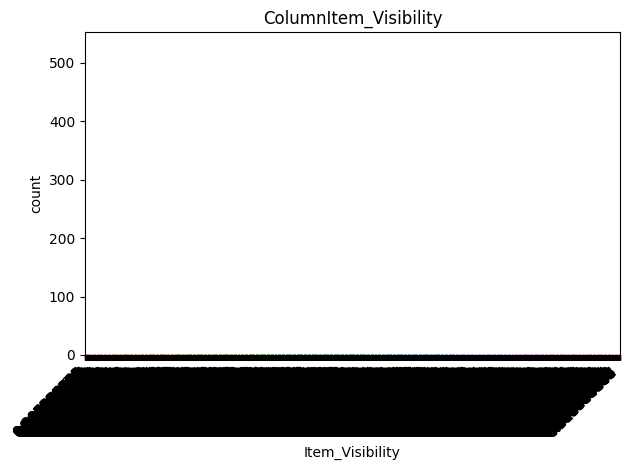

Nan's Found: 0 (0.0%
Unique Values: 7880
 Most common value: '0.0' occurs 526 times
Not constant or quasi constant


In [293]:
explore_categorical(df_sales_predictions, 'Item_Visibility');

In [294]:
# Check cardinality
nunique = df_sales_predictions['Item_Visibility'].nunique()
print(f'There are {nunique} unique values')

There are 7880 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 7880, very high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Item_Type
- Definition: Category to which the item belongs

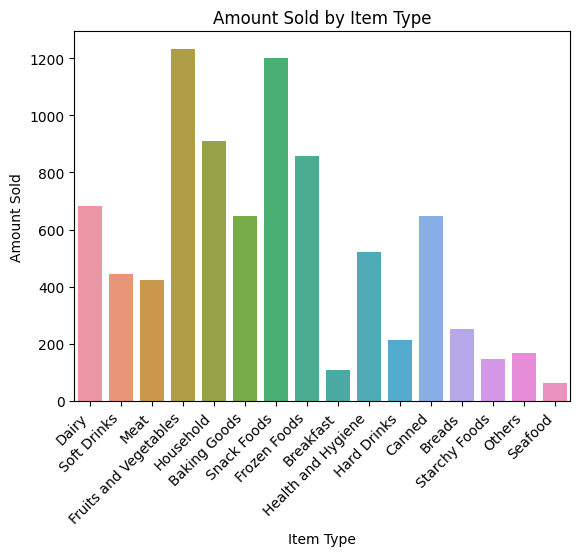

In [295]:
ax = sns.countplot(data=df_sales_predictions, x='Item_Type')
ax.set_title('Amount Sold by Item Type')
ax.set_ylabel('Amount Sold')
ax.set_xlabel('Item Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

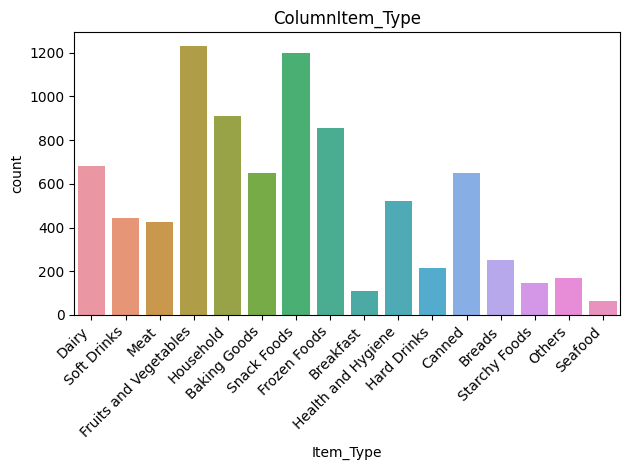

Nan's Found: 0 (0.0%
Unique Values: 16
 Most common value: 'Fruits and Vegetables' occurs 1232 times
Not constant or quasi constant


In [298]:
explore_categorical(df_sales_predictions, 'Item_Type');

In [296]:
# Check cardinality
nunique = df_sales_predictions['Item_Type'].nunique()
print(f'There are {nunique} unique values')

There are 16 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 16, it is high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Item_MRP
- Definition: Maximum Retail Price (list price) of the Product

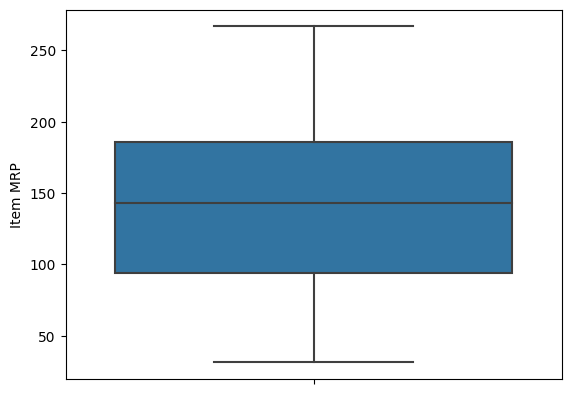

In [299]:
ax = sns.boxplot(data=df_sales_predictions, y="Item_MRP")
ax.set_ylabel('Item MRP');

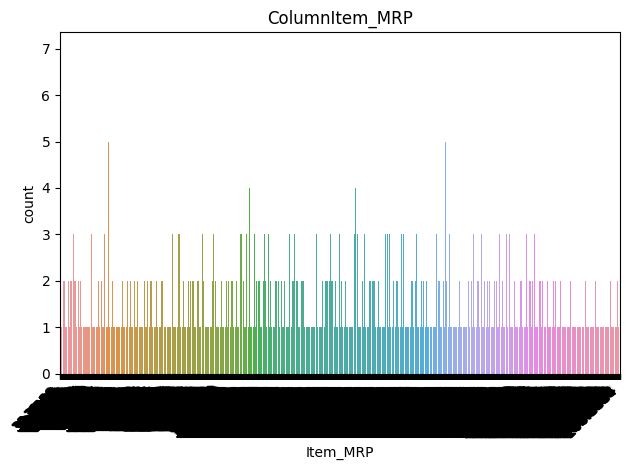

Nan's Found: 0 (0.0%
Unique Values: 5938
 Most common value: '172.0422' occurs 7 times
Not constant or quasi constant


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'ColumnItem_MRP'}, xlabel='Item_MRP', ylabel='count'>)

In [303]:
explore_categorical(df_sales_predictions, "Item_MRP")

In [300]:
# check cardinality
nunique = df_sales_predictions['Item_MRP'].nunique()
print(f'There are {nunique} unique values')

There are 5938 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 5938, it is high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Outlet_Identifier
- Definition: Store ID

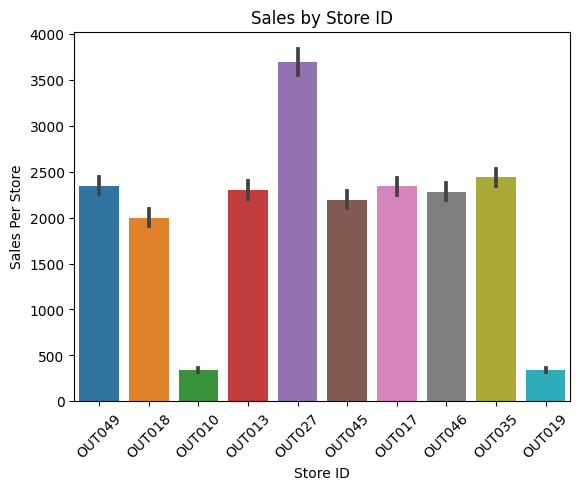

In [304]:
ax = sns.barplot(data=df_sales_predictions, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xlabel('Store ID')
ax.set_title('Sales by Store ID')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Sales Per Store');

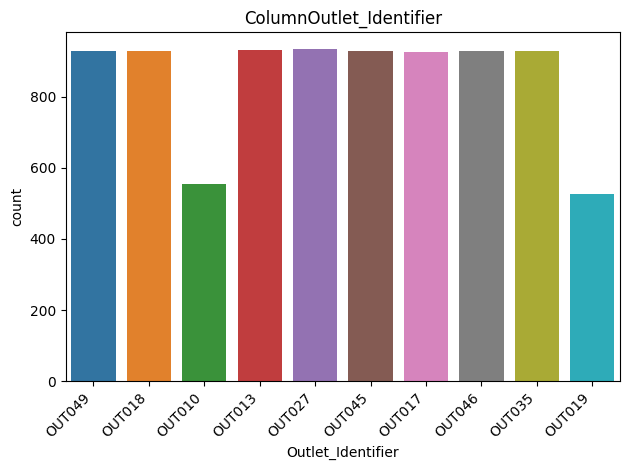

Nan's Found: 0 (0.0%
Unique Values: 10
 Most common value: 'OUT027' occurs 935 times
Not constant or quasi constant


In [305]:
explore_categorical(df_sales_predictions, 'Outlet_Identifier');

In [306]:
# check cardinality
nunique = df_sales_predictions['Outlet_Identifier'].nunique()
print(f'There are {nunique} unique values')

There are 10 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 10, cardinality is not high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Outlet_Establishment_Year
- Definition: Year store was Established



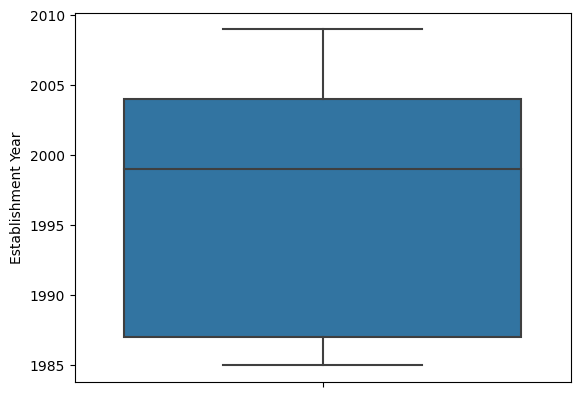

In [307]:
ax = sns.boxplot(data=df_sales_predictions, y="Outlet_Establishment_Year")
ax.set_title('')
ax.set_ylabel('Outlet_Establishment_Year')
ax.set_ylabel('Establishment Year');

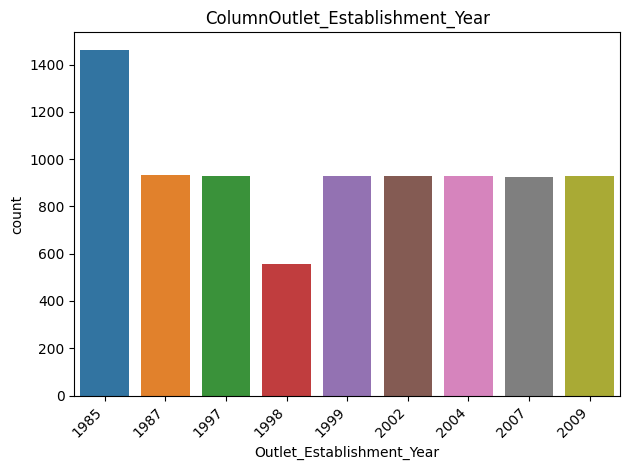

Nan's Found: 0 (0.0%
Unique Values: 9
 Most common value: '1985' occurs 1463 times
Not constant or quasi constant


In [309]:
explore_categorical(df_sales_predictions, 'Outlet_Establishment_Year');

In [310]:
# check cardinality
nunique = df_sales_predictions['Outlet_Establishment_Year'].nunique()
print(f'There are {nunique} unique values')

There are 9 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 9, cardinality is not high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Outlet_Size
- Definition: Outlet Size in terms of ground area covered (Small, Medium, High)



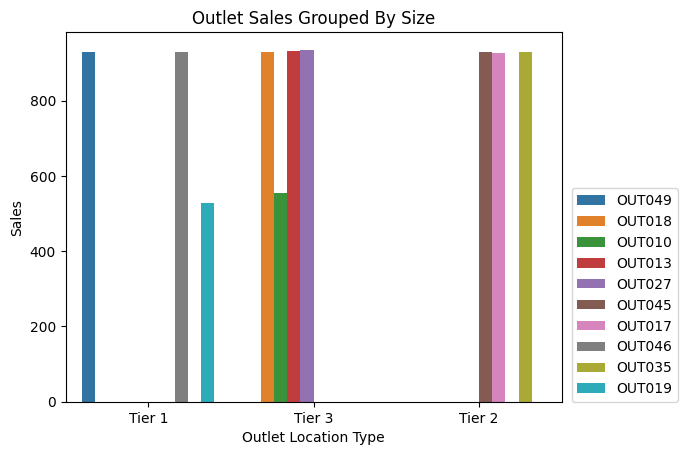

In [311]:
ax = sns.countplot(data=df_sales_predictions, x='Outlet_Location_Type', hue = 'Outlet_Identifier')
ax.set_title('Outlet Sales Grouped By Size')
ax.set_ylabel('Sales')
ax.set_xlabel('Outlet Location Type')
ax.legend(loc=(1.02,0));

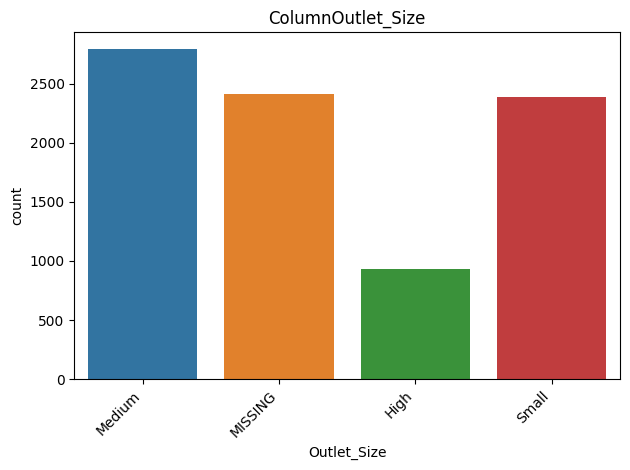

Nan's Found: 0 (0.0%
Unique Values: 4
 Most common value: 'Medium' occurs 2793 times
Not constant or quasi constant


In [313]:
from pandas.core.indexers import check_array_indexer
explore_categorical(df_sales_predictions, 'Outlet_Size');

In [314]:
# check cardinality
nunique = df_sales_predictions['Outlet_Size'].nunique()
print(f'There are {nunique} unique values')

There are 4 unique values


- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 4, the cardinality is not high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Outlet_Location_Type
- Definition: Type of ares in which the store is located  (Tier 1, Tier 2, Tier 3)


In [ ]:
ax = sns.countplot(data=df_sales_predictions, x='Outlet_Location_Type', hue = 'Outlet_Size')
ax.set_title('Sales By Location Type')
ax.set_ylabel('Sales')
ax.set_xlabel('Outlet Locatiopn Type')
ax.legend(loc=(1.02,0));

In [ ]:
# check cardinality
nunique = df_sales_predictions['Outlet_Location_Type'].nunique()
print(f'There are {nunique} unique values')

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 3, the cardinality is not high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Outlet_Type
- Definition: Retail Outlet Tier Level (Grocery Store, Supermarket Type 1, Supermarket Type 2, Supermarket Type 3)

In [ ]:
ax = df_sales_predictions['Outlet_Type'].hist()
ax.set_xlabel("Outlet Type")
ax.set_ylabel('Product Sales')
ax.set_title('Sales by Outlet Type');

In [ ]:
# check cardinality
nunique = df_sales_predictions['Outlet_Type'].nunique()
print(f'There are {nunique} unique values')

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 4, the cardinality is not high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

## Item_Outlet_Sales
- Definition: Sales of the product in the particular store. This is the target variable to be predicted

In [ ]:
g= sns.lmplot(data=df_sales_predictions, x="Item_Visibility", y="Item_Outlet_Sales", hue="Outlet_Location_Type")
g.ax.set_xlabel('Item Visibility')
g.ax.set_ylabel('Sales')
g.ax.set_title('Sales by Item Size and Outlet Visibility');


In [ ]:
# check cardinality
nunique = df_sales_predictions['Item_Outlet_Sales'].nunique()
print(f'There are {nunique} unique values')

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

- Is the feature constant or quasi-constant?

- What is the cardinality? Is it high (>10)?
  - 3493, the cardinality is high

- Would we know this feature before the target is determined?

- Is there a business case/understanding reason to exclude based on our business case?

___

## Create a multivariate visualization plotting each feature vs. the target.
You may use the EDA functions from the previous lessons or create your own visualizations.​

In [ ]:
# Multivariate vizualization for Outlet_Size, Establishment_Year and Item_Outlet_Sales
g = sns.catplot(data=df_sales_predictions, x='Outlet_Establishment_Year', y='Item_Outlet_Sales',hue='Outlet_Size',
                kind='boxen', dodge=False)
g.ax.set_xlabel('Outlet Establishment Year')
g.ax.set_ylabel('Sales')
g.ax.set_title('Sales by Outlet Size and Establishment Year');

In [ ]:
ax=sns.countplot(data=df_sales_predictions, x='Outlet_Location_Type', hue='Outlet_Identifier')
ax.legend(loc=(1.02,0));

In [ ]:
# multivariate bar plot for visibility and outlet type
x = sns.barplot(data=df_sales_predictions, x='Outlet_Type', y='Item_Visibility')

In [ ]:
# multicariate catplot
g = sns.catplot(data=df_sales_predictions, x='Item_Identifier', y='Item_MRP')

In [ ]:
ax = sns.stripplot(data=df_sales_predictions, x='Item_Weight', y='Item_Type',
                   hue='Item_Fat_Content', edgecolor='white', linewidth=1)
ax.legend(loc=(1.02,0));

## Answer the following questions from the Feature Inspection lesson in a Markdown cell:

- Based on your business understanding, would you expect this feature to be a predictor of the target?
- Does this feature appear to be a predictor of the target?